# **Bangkok Airbnb Listings 2023 Data Analysis**
*by Cindy Handoko Tantowibowo*

### 1. Background

Our client is a Bangkok citizen looking to start hosting an Airbnb. As a strategy consultant, we are expected to analyze the Bangkok Airbnb Listing data from 2023 to identify the best strategy for opening an Airbnb business.

### 2. Problem Statement

Our client wants to know the following:
1. What is the best area in Bangkok to invest in a property for Airbnb?
1. What is the best listing type (apartment/hotel/etc.)?
1. What is the most sought after price range per night?

### 3. Preparation

First, we have to prepare the data to be analyzed.

In [216]:
# %pip install geopy

In [217]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Bangkok2023")

This is the details of our dataset.

Dataset title: **Bangkok Airbnb Listings 2023**<br>
Dataset source: https://www.kaggle.com/datasets/minemartin/bangkok-airbnb-listings

In [218]:
# Load dataset

df = pd.read_csv("Bangkok_Listings_2023.csv")

# Display the first and last rows of the dataset
display(df.head(), df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1885,3,65,0.49,2,362
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1307,1,0,0.00,2,358
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,3,0.04,1,358
4,906203,1 BR on Srinakrin Rd. Parkland,4850305,Dujdao,Bang Na,13.65441,100.64548,Private room,791,1,0,0.00,1,365


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17391,856235727134350515,2-2 Thong lo 4卧别墅 可住10人 可派对,506389560,Apple,Vadhana,13.737850,100.584100,Entire home/apt,8224,1,0,0.0,29,365
17392,856255024356890986,Huai Khwang最新CBD公寓｜捷运3km｜免费WIFI｜全套家具家电｜泳池健身房｜长...,272690598,Zoe,Huai Khwang,13.767589,100.581963,Entire home/apt,916,30,0,0.0,1,364
17393,856260086330897689,Family Room - Room #12 (4ppl),180473956,Abe,Khlong Toei,13.736933,100.557028,Entire home/apt,1119,3,0,0.0,9,362
17394,856260776045561925,1-1Kunst Sta Mrt 180m Hua Lamphong หัวลำโพง,506389560,Apple,Bang Rak,13.737568,100.516389,Entire home/apt,1620,1,0,0.0,29,360
17395,856269506314170227,"Deluxe room, Bitec Bangna (Twin Bed)",456119431,The Shade House,Bang Na,13.670467,100.615068,Private room,1090,1,0,0.0,11,365


### 4. Data Understanding

This dataset contains the following columns:
1. `id` - The unique identifier of listing
1. `name` - The name of listing
1. `host_id` - The unique identifier of the listing host
1. `host_name` - The name of the listing host
1. `neighbourhood` - The name of the neighbourhood that the listing is located at
1. `latitude` - The geographical latitude of the listing for mapping purposes
1. `longitude` - The geographical longitude of the listing for mapping purposes
1. `room_type` - The room type that the listing offers
1. `price` - The price per night
1. `minimum_nights` - The minimum number of nights that the listing can be rented
1. `number_of_reviews` - The total number of reviews
1. `reviews_per_month` - The average reviews per month
1. `calculated_host_listings_count` - The total number of listings owned by the host
1. `availability_365` - The number of days that the listing is opened for rent throughout the year (2023)

In [219]:
# Get the shape of the data

print(f'The numbers of rows and columns in the dataset are {df.shape}')
df.info()

The numbers of rows and columns in the dataset are (17396, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17396 entries, 0 to 17395
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17396 non-null  int64  
 1   name                            17388 non-null  object 
 2   host_id                         17396 non-null  int64  
 3   host_name                       17395 non-null  object 
 4   neighbourhood                   17396 non-null  object 
 5   latitude                        17396 non-null  float64
 6   longitude                       17396 non-null  float64
 7   room_type                       17396 non-null  object 
 8   price                           17396 non-null  int64  
 9   minimum_nights                  17396 non-null  int64  
 10  number_of_reviews               17396 non-null  int64  
 11  reviews_per_month             

In [220]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.739600e+04,1.739600e+04,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.000000,17396.00000
mean,2.420969e+17,1.689798e+08,13.745011,100.560288,2887.079099,14.990458,16.724879,0.603935,17.206369,254.52696
std,3.540119e+17,1.447823e+08,0.042415,0.049918,21082.749949,47.365327,40.879010,1.103127,35.477404,122.60406
min,2.793400e+04,5.892000e+04,13.527300,100.329550,120.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,2.311423e+07,4.254649e+07,13.720098,100.530389,900.000000,1.000000,0.000000,0.000000,1.000000,156.00000
50%,3.901822e+07,1.324732e+08,13.738630,100.562059,1384.000000,1.000000,2.000000,0.130000,5.000000,328.00000
75%,6.888730e+17,2.648650e+08,13.758882,100.584982,2242.000000,14.000000,14.000000,0.810000,17.000000,364.00000
max,8.564852e+17,5.070882e+08,13.953540,100.923440,1000000.000000,1115.000000,1379.000000,39.580000,247.000000,365.00000


,name,host_name,neighbourhood,room_type
count,17388,17395,17396,17396
unique,15951,5446,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,247,2515,10083


#### Creating a Summary Table

In [221]:
listItem = []
for col in df.columns :
    listItem.append([   col,
                        df[col].dtype ,
                        df[col].isnull().sum(),
                        f"{(df[col].isnull().sum()/df[col].shape[0])*100:.2f}%",
                        df[col].nunique(),
                        df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name','Data Type','Null', 'Percentage Null', 'Number of Unique', 'Unique Sample'],
                    data=listItem)
tabel_Desc

,Column Name,Data Type,Null,Percentage Null,Number of Unique,Unique Sample
0,id,int64,0,0.00%,17396,"[27934, 27979, 28745, 35780, 906203, 1657411, ..."
1,name,object,8,0.05%,15951,"[Nice room with superb city view, Easy going l..."
2,host_id,int64,0,0.00%,6854,"[120437, 120541, 123784, 153730, 4850305, 8362..."
3,host_name,object,1,0.01%,5446,"[Nuttee, Emy, Familyroom, Sirilak, Dujdao, Luc..."
4,neighbourhood,object,0,0.00%,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, L..."
5,latitude,float64,0,0.00%,11419,"[13.75983, 13.66818, 13.75232, 13.78823, 13.65..."
6,longitude,float64,0,0.00%,12040,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.00%,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.00%,2992,"[1885, 1307, 800, 1286, 791, 1302, 1547, 3549,..."
9,minimum_nights,int64,0,0.00%,90,"[3, 1, 60, 7, 2, 5, 30, 28, 250, 15, 21, 25, 1..."


#### Understanding Variable Types

Now, we are going to categorize each column based on the variable type to understand the data requirements better.

| Qualitative Variables | Quantitative Variables |
|---|---|
| id | latitude |
| name | longitude |
| host_id | price |
| host_name | minimum_nights |
| neighbourhood | number_of_reviews |
| | reviews_per_month |
| | calculated_host_listings_count |
| | availability_365 |

#### Identifying Outliers

Now, let's identify outliers in the relevant quantitative variables to identify abnormal/extreme values.

In [222]:
# Finding outliers in the data using IQR

# Define the function
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

1. Finding outliers in the `Price` column

In [223]:
# Find outliers in 'price' column
price_outliers = find_outliers_iqr(df, 'price')

# Show the rows with outliers
print(price_outliers[['name', 'price']])

                                               name   price
9      Newly Renovated 3BR Suite 146sqm BTS Thonglo    4298
22                 24Flr- 1br Apt near JJ, MRT, BTS  121313
27              Central Bangkok 3 Bedroom Apartment    5620
57              Urban Oasis in the heart of Bangkok    5429
61              Beautiful Wood Bangkok Resort House    8597
...                                             ...     ...
17360   1min BTS Stylish Home / Sleep 13 / King Bed   13406
17382                          Regent royal place 1    4500
17387              3-bedroom apartment (3E 300 sqm)    5500
17390                   2-1 Thong lo 4卧别墅 可住10人 可派对    8224
17391                   2-2 Thong lo 4卧别墅 可住10人 可派对    8224

[1559 rows x 2 columns]


Visualize the outliers in the `Price` column

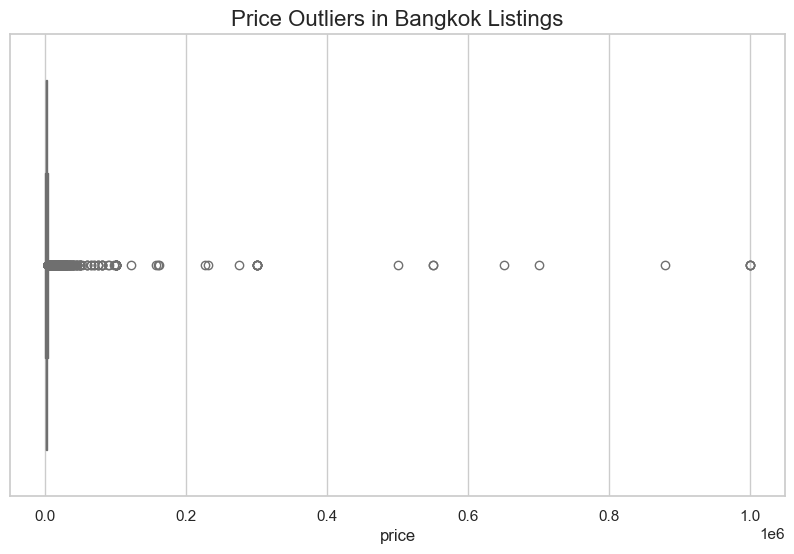

In [224]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', color='skyblue')

# Add a title
plt.title('Price Outliers in Bangkok Listings', fontsize=16)
plt.show()

2. Finding outliers in the `minimum_nights` column

In [225]:
# Find outliers in 'minimum_nights' column
price_outliers = find_outliers_iqr(df, 'minimum_nights')

# Show the rows with outliers
print(price_outliers[['name', 'minimum_nights']])

                                      name  minimum_nights
2        modern-style apartment in Bangkok              60
30          NEw Pro!!  Bungalow Bkk Centre             250
45     Contemporary Modern Duplex-Thong Lo              60
52      ICONSIAM River view  on 49th floor             180
56     2br apt in Sukhumvit Asoke near BTS              90
...                                    ...             ...
17140       Near Famous Train Night Market              90
17330     1 bed 1 bath MRT Rama 9 Joddfair              90
17337         Studio room only 200m to BTS             180
17345                           Super idol              80
17376      High Fl Chic/Airport rail/Wi-fi              45

[805 rows x 2 columns]


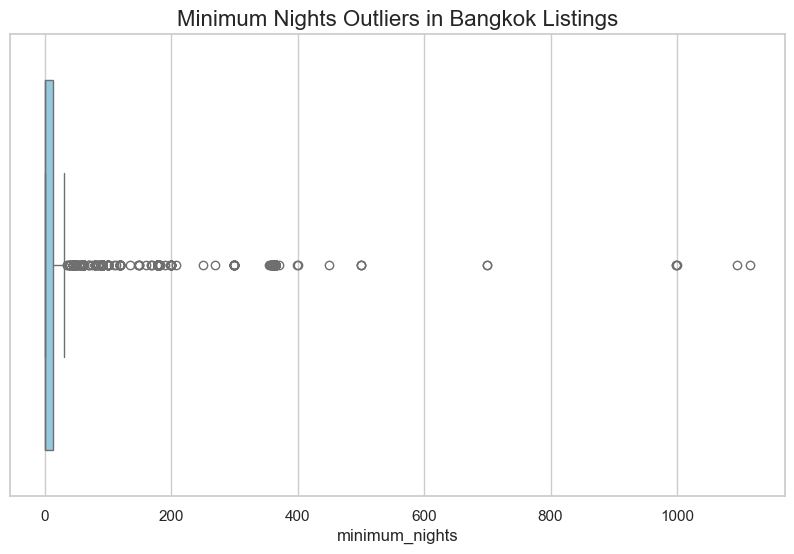

In [226]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'minimum_nights' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='minimum_nights', color='skyblue')

# Add a title
plt.title('Minimum Nights Outliers in Bangkok Listings', fontsize=16)
plt.show()

3. Finding outliers in the `number_of_reviews` column

In [227]:
# Find outliers in 'number_of_reviews' column
price_outliers = find_outliers_iqr(df, 'number_of_reviews')

# Show the rows with outliers
print(price_outliers[['name', 'number_of_reviews']])

                                                    name  number_of_reviews
0                        Nice room with superb city view                 65
5                              Near Suvarnabhumi Airport                 63
9           Newly Renovated 3BR Suite 146sqm BTS Thonglo                265
10     ❂Citycenter✺Subway station✺Private Bathroom✺A1...                201
11          Comfy bedroom near River pier & BTS  Taksin.                208
...                                                  ...                ...
14267  Bangkok Cheesy-Loft by The Locals (Newly opened)*                 45
14268   Bangkok The locals-Loft Ideal for family/friends                 40
14314  1BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-Suns...                 55
14319      2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub                 67
14461         1BR- BTS Ekamai 300m-Sky infinity Pool&Gym                157

[2279 rows x 2 columns]


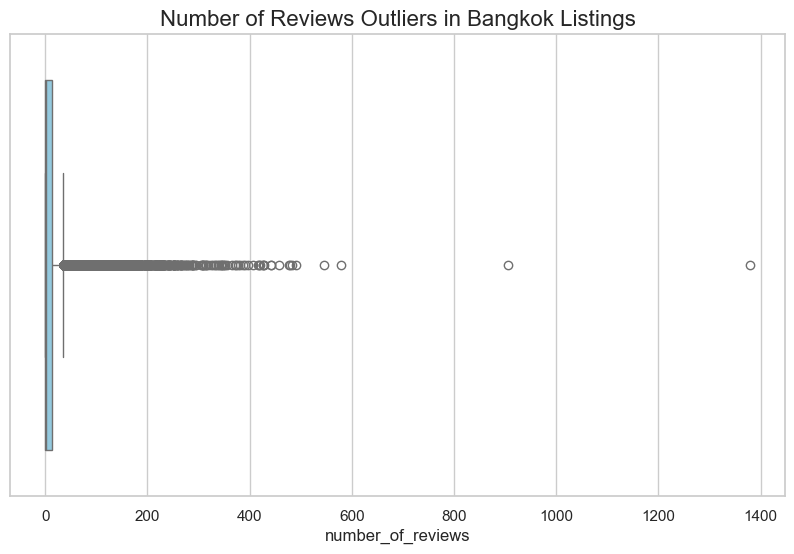

In [228]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'number_of_reviews' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='number_of_reviews', color='skyblue')

# Add a title
plt.title('Number of Reviews Outliers in Bangkok Listings', fontsize=16)
plt.show()

4. Finding outliers in the `reviews_per_month` column

In [229]:
# Find outliers in 'reviews_per_month' column
price_outliers = find_outliers_iqr(df, 'reviews_per_month')

# Show the rows with outliers
print(price_outliers[['name', 'reviews_per_month']])

                                                    name  reviews_per_month
9           Newly Renovated 3BR Suite 146sqm BTS Thonglo               2.16
39                      The Duplex - Asoke- Luxury 92sqm               2.54
58           ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀               3.69
60     ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...               2.58
62                  ☞Downtown Central Studio-Bangkok MRT               2.95
...                                                  ...                ...
17034      1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP               3.00
17035                        Deluxe 1 Bedroom - GYM/WIFI               4.00
17151                               Hot Summer三层Loft高级公寓               3.00
17159  NEW5minswalk>BTS Eakamai/TV65netflix/Water Mac...               3.00
17270                   Awesome 1bed 2min walk BTS Onnut               3.00

[1398 rows x 2 columns]


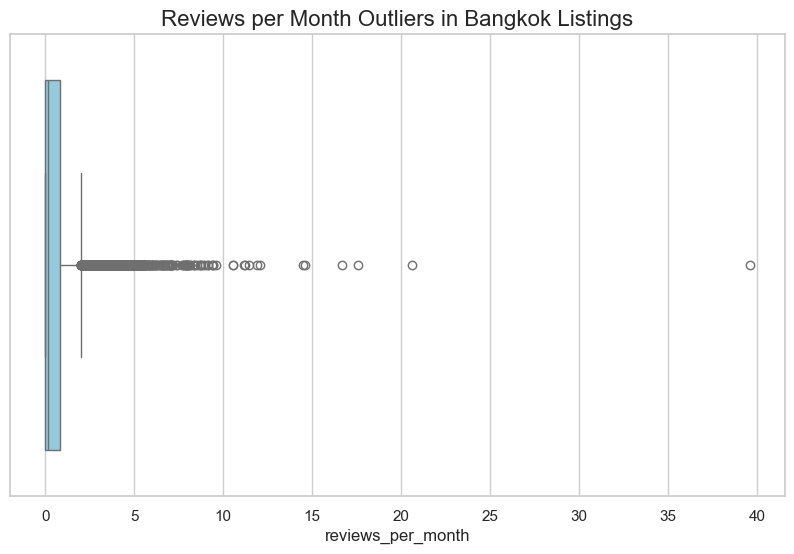

In [230]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'reviews_per_month' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='reviews_per_month', color='skyblue')

# Add a title
plt.title('Reviews per Month Outliers in Bangkok Listings', fontsize=16)
plt.show()

5. Finding outliers in the `calculated_host_listings_count` column

In [231]:
# Find outliers in 'calculated_host_listings_count' column
price_outliers = find_outliers_iqr(df, 'calculated_host_listings_count')

# Show the rows with outliers
print(price_outliers[['name', 'calculated_host_listings_count']])  

                                                    name  \
30                        NEw Pro!!  Bungalow Bkk Centre   
103                         Spacious Studio kitchen/wifi   
107                      2. Bangkok bright Apartment 201   
108                    1.Bangkok great value Studio WIFI   
111             BKK City Fab Luxx Studio free wifi @1194   
...                                                  ...   
17317    市中心无敌城市景观雅致一室一厅套房 四面佛1公里 机场20分钟直达素坤逸娜娜 火车夜市10分钟   
17333   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(116)   
17334    Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(98)   
17336  Perfect location# Pool#Gym@BTS/MRT&10F&Max3ppl...   
17338   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(118)   

       calculated_host_listings_count  
30                                 44  
103                                44  
107                                44  
108                                44  
111                                44  
...                               ...  

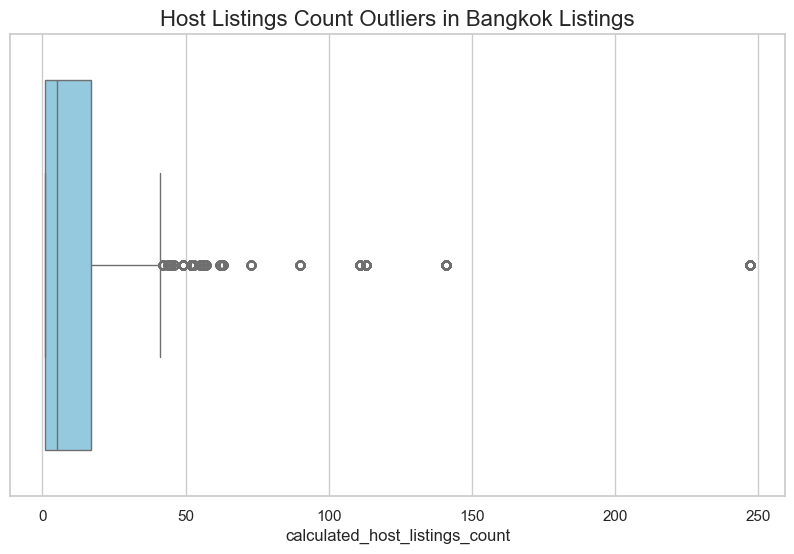

In [232]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'calculated_host_listings_count' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='calculated_host_listings_count', color='skyblue')

# Add a title
plt.title('Host Listings Count Outliers in Bangkok Listings', fontsize=16)
plt.show()

6. Finding outliers in the `availability_365` column

In [233]:
# Find outliers in 'availability_365' column
price_outliers = find_outliers_iqr(df, 'availability_365')

# Show the rows with outliers
print(price_outliers[['name', 'availability_365']])

Empty DataFrame
Columns: [name, availability_365]
Index: []


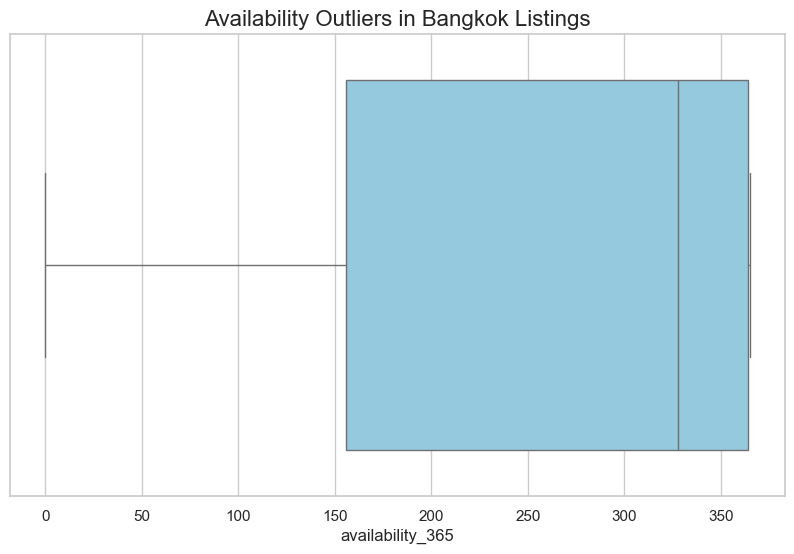

In [234]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for the 'availability_365' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='availability_365', color='skyblue')

# Add a title
plt.title('Availability Outliers in Bangkok Listings', fontsize=16)
plt.show()

Since the year 2023 has 365 days, availability should be within 365 days. Hence, there is no abnormal value in the `availability_365` column based on the graph above.

**Insights:**
1. The `id` and `host_id` columns' data type is **integer**, which is incorrect as they are qualitative variables, thus it should be **string**.
1. There are null values in `name` and `host_name`
1. Outliers exist in some quantitative columns, but the ones that potentially require cleaning would be `minimum_nights` and `review_per_month` since they are time-restricted. Time-restricted values have limitations where they are still considered acceptable vs abnormal.

### 5. Data Cleaning

#### Changing Incorrect Data Types

In [235]:
# Changing the data type of the 'id' column
df['id'] = df['id'].astype(str)

# Check the data type of 'id' now
print(f"Now, the data type of the 'id' column has become {df['id'].dtype}.")

Now, the data type of the 'id' column has become object.


In [236]:
# Changing the data type of the 'host_id' column
df['host_id'] = df['host_id'].astype(str)

# Check the data type of 'host_id' now
print(f"Now, the data type of the 'host_id' column has become {df['host_id'].dtype}.")

Now, the data type of the 'host_id' column has become object.


#### Handling Null/Missing Values

1. The `name` column only acts as a non-unique identifier of a listing. So, the value does not have any specific pattern or rule. We are going to fill up missing values with 'unnamed'.

In [237]:
# Check the columns where 'name' is null
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
395,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0.00,1,365
488,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0.00,1,365
521,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0.00,1,365
840,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2399,2,0,0.00,1,365
1152,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0.00,1,365
1369,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,0.07,1,364
1612,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0.00,1,365
2045,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,0.03,3,304


In [238]:
# Fill null values in the 'name' column with 'Unnamed'
df['name'].fillna('Unnamed', inplace=True)

# Check if it worked
print(f"Currently, the number of null value(s) in the 'name' column is {df['name'].isnull().sum()}.")

Currently, the number of null value(s) in the 'name' column is 0.


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\339419567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unnamed', inplace=True)


2. The `host_name` column shows the name of the host owning the listing. In the table, there is another identifier for host, which is `host_id`. We are going to check what the value in the `host_id` column on the row where `host_name` value is missing.

In [239]:
# Check the columns where 'host_name' is null
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3487,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.01,1,365


In [240]:
# Display all columns with the same host_id
df[df['host_id']=='137488762']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3487,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.01,1,365


Because there is no other row with the same host_id, we will use the host_id as host_name.

In [241]:
# Fill empty host_name with its host_id
df['host_name'].fillna(df['host_id'],inplace=True)

# Check if it worked
print(f"Currently, the number of null value(s) in the 'host_name' column is {df['host_name'].isnull().sum()}.")

Currently, the number of null value(s) in the 'host_name' column is 0.


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\2218461137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna(df['host_id'],inplace=True)


#### Handling Outliers

Next, we will handle outliers in the `review_per_month` column.

Since we have the `minimum_nights` data, we can determine the realistic values of `review_per_month` per listing.

However, there is also additional information to be taken into account. Airbnb has a policy that user can only leave a review a maximum of 14 (fourteen) days after checkout (Source: https://www.airbnb.com/help/article/995). So, there could be carry-overs from the previous month.

In [242]:
# Create a function to calculate realistic number of review per month

def max_rpm_calc(min_nights:int):
    # Calculate maximum number of stays per month
    max_num_stay = 30/min_nights

    # Calculate maximum number of carry-over from the previous month
    max_carry_over = 14/min_nights

    # Assuming the first month has maximum carry-over from the previous year, let's calculate the maximum average review per month
    max_avg_rpm = ((max_num_stay*12)+max_carry_over)/12
    
    return max_avg_rpm


In [243]:
# Create a new column to store this value
df['max_rpm'] = df['minimum_nights'].apply(lambda x: max_rpm_calc(x))

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,max_rpm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1885,3,65,0.49,2,362,10.388889
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1307,1,0,0.00,2,358,31.166667
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0.519444
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,3,0.04,1,358,4.452381
4,906203,1 BR on Srinakrin Rd. Parkland,4850305,Dujdao,Bang Na,13.65441,100.64548,Private room,791,1,0,0.00,1,365,31.166667


If `review_per_month` is more than `max_rpm`, the data is most likely false.

Assume we want a confidence level of at least 90%. We will see how many rows have significantly different `review_per_month` and `max_rpm` values (more than 10%).

In [244]:
# See if there are such rows

print(f"There are {len(df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) > 10])} ({len(df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) > 10]) / len(df) * 100}%) rows containing an unrealistic review per month value.")


There are 415 (2.3856058864106693%) rows containing an unrealistic review per month value.


Because the number of abnormal rows is insignificant (less than 5%), we will drop the columns.

In [245]:
df = df[((df['reviews_per_month']-df['max_rpm'])/df['max_rpm'] * 100) <= 10]

In [246]:
# Dropping the max_rpm column
df = df.drop('max_rpm', axis=1)

#### Checking cleaned up data

In [247]:
listItem = []
for col in df.columns :
    listItem.append([   col,
                        df[col].dtype ,
                        df[col].isnull().sum(),
                        f"{(df[col].isnull().sum()/df[col].shape[0])*100:.2f}%",
                        df[col].nunique(),
                        df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name','Data Type','Null', 'Percentace Null', 'Number of Unique', 'Unique Sample'],
                    data=listItem)

print(df.shape)
tabel_Desc

(16981, 14)


,Column Name,Data Type,Null,Percentace Null,Number of Unique,Unique Sample
0,id,object,0,0.00%,16981,"[27934, 27979, 28745, 35780, 906203, 1657411, ..."
1,name,object,0,0.00%,15577,"[Nice room with superb city view, Easy going l..."
2,host_id,object,0,0.00%,6766,"[120437, 120541, 123784, 153730, 4850305, 8362..."
3,host_name,object,0,0.00%,5393,"[Nuttee, Emy, Familyroom, Sirilak, Dujdao, Luc..."
4,neighbourhood,object,0,0.00%,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, L..."
5,latitude,float64,0,0.00%,11236,"[13.75983, 13.66818, 13.75232, 13.78823, 13.65..."
6,longitude,float64,0,0.00%,11860,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,0,0.00%,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,0,0.00%,2969,"[1885, 1307, 800, 1286, 791, 1302, 1547, 3549,..."
9,minimum_nights,int64,0,0.00%,81,"[3, 1, 60, 7, 2, 5, 30, 28, 15, 25, 180, 90, 4..."


In [248]:
print(f'The numbers of rows and columns in the cleaned dataset are {df.shape}')

The numbers of rows and columns in the cleaned dataset are (16981, 14)


### 6. Exploratory Data Analysis (EDA)

#### 1. Finding the pricing tendency

First, we are going to find the average price of Airbnbs in 2023. This is to land on a reasonable price conclusion and understand the method by which the central tendency is best measured.

In [249]:
# Checking the general description of the column
df['price'].describe()

count      16981.000000
mean        2737.403686
std        16715.217264
min          278.000000
25%          900.000000
50%         1389.000000
75%         2250.000000
max      1000000.000000
Name: price, dtype: float64

Key takeaways:
1. The mean of listing price is 2,737 THB.
1. The median of listing price is 1,389 THB.
1. The listing price analyzed ranges from 278 THB to 1,000,000 THB.

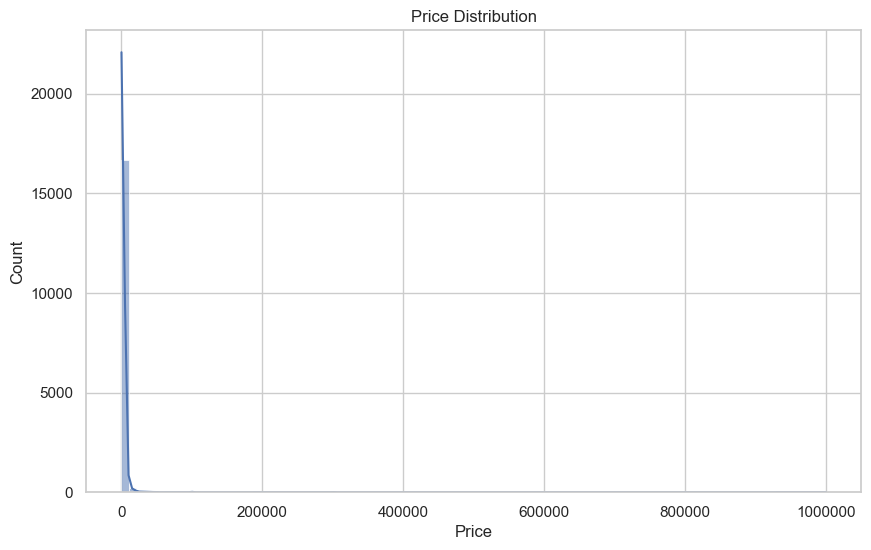

In [250]:
# Showing the distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.ticklabel_format(style='plain', axis='x')  # Remove scientific notation
plt.xlabel('Price')
plt.show()

In [251]:
# Determine skewness and kurtosis of price

print("Kurtosis: ", df['price'].kurt())
print("Skewness: ", df['price'].skew())

Kurtosis:  1737.1818543455818
Skewness:  37.72956758818485


**Insights:**
1. Price distribution is abnormal.
1. Extreme positive kurtosis: Distribution is abnormal (not close to 0).
1. Positive skewness: most listings are priced below average.
1. Measure of central tendency uses `median` because the distribution is abnormal and skewed.

Now, we are going to group our `price` data into ranges. Since our data is highly abnormal, we will use custom-sized bins as follows:

| Price Range (THB) | Category |
|---|---|
| < 500 | Budget |
| 500 - 1000 | Affordable |
| 1000 - 2000 | Mid-tier |
| 2000 - 5000 | High-end |
| 5000 - 10,000 | Premium |
| >= 10,000 | Luxury |

In [252]:
# Define custom bin edges and labels
bin_edges = [0, 500, 1000, 2000, 5000, 10000, float('inf')]
bin_labels = [
    '< 500 THB',
    '500-1000 THB',
    '1000-2000 THB',
    '2000-5000 THB',
    '5000-10000 THB',
    '>= 10000 THB'
]

# Create a new column for the price category
df['price_range'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

# View the distribution
price_range_counts = df['price_range'].value_counts().sort_index()

price_range_counts

price_range
< 500 THB          767
500-1000 THB      4502
1000-2000 THB     6571
2000-5000 THB     3902
5000-10000 THB     847
>= 10000 THB       392
Name: count, dtype: int64

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\548751846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="viridis")


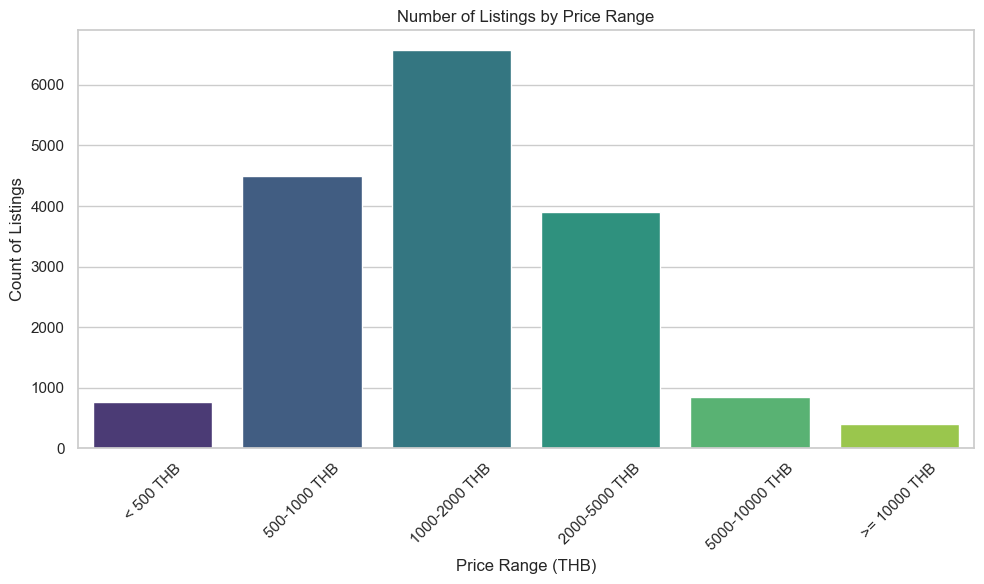

In [253]:
# Visualize the price ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="viridis")
plt.title('Number of Listings by Price Range')
plt.xlabel('Price Range (THB)')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\1485696018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_room_type = df.groupby(['price_range', 'room_type']).size().unstack().fillna(0)


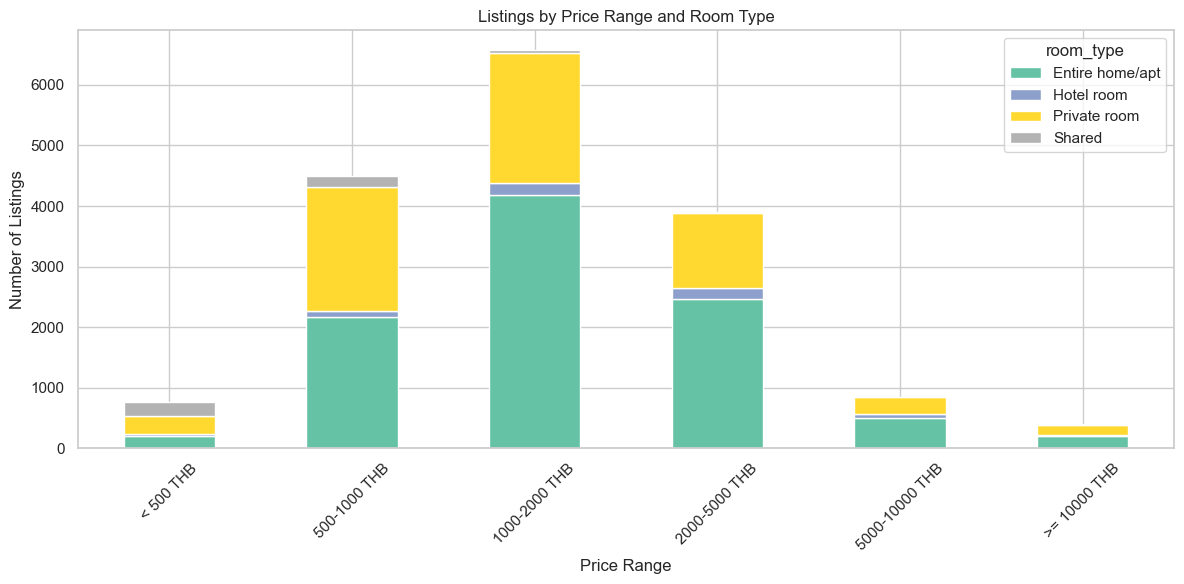

In [254]:
# Group by price range and room type
price_room_type = df.groupby(['price_range', 'room_type']).size().unstack().fillna(0)

# Plot stacked bar chart
price_room_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Listings by Price Range and Room Type')
plt.xlabel('Price Range')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights:**
1. Most listings are priced between 1000-2000 THB.
1. Very few listings are priced below 500 THB and above 5000 THB.

In [255]:
# Summary statistics for each price range
summary_stats = df.groupby('price_range').agg(
    count=('price_range', 'count'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()

summary_stats

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\848260648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df.groupby('price_range').agg(


,price_range,count,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,1000-2000 THB,6571,109212,16.620301,2.0,42.255503,0.642459,0.19,1.095914
1,500-1000 THB,4502,76345,16.958019,3.0,39.185217,0.527117,0.15,0.901776
2,2000-5000 THB,3902,63984,16.397745,1.0,40.851369,0.615067,0.06,1.170220
3,5000-10000 THB,847,9362,11.053129,1.0,27.732993,0.423613,0.02,0.870971
4,< 500 THB,767,7162,9.337679,1.0,23.264220,0.397523,0.05,0.834158
5,>= 10000 THB,392,2779,7.089286,0.0,25.745751,0.200485,0.00,0.513020


**Conclusion:**
<br>1000-2000 THB is the optimal price range, and most listings are priced within this range.

#### 2. Finding the most popular room type

Next, we are going to analyze the key statistical values of price, number of reviews, and review per month for each room type.

In [256]:
# Summary statistics for each room_type
summary_stats = df.groupby('room_type').agg(
    count=('room_type', 'count'),
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    price_std=('price', 'std'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
)

# Top 3 neighbourhoods per room type
top_neighbourhoods = (
    df.groupby(['room_type', 'neighbourhood'])
    .size()
    .reset_index(name='count')
    .sort_values(['room_type', 'count'], ascending=[True, False])
)

# Get top 3 per room_type
top3_neighbourhoods = (
    top_neighbourhoods.groupby('room_type')
    .head(3)
    .groupby('room_type')['neighbourhood']
    .apply(lambda x: ', '.join(x))
)

# Merge the two summaries
final_summary = pd.merge(summary_stats, top3_neighbourhoods, on='room_type').sort_values(by='count', ascending=False).reset_index()

# Display the result
final_summary

,room_type,count,price_mean,price_median,price_std,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std,neighbourhood
0,Entire home/apt,9693,2699.356855,1500.0,15902.100093,200138,20.647684,4.0,43.795340,0.754631,0.34,1.132692,"Vadhana, Khlong Toei, Huai Khwang"
1,Private room,6153,2879.554851,1200.0,18871.036853,54411,8.843003,1.0,29.663036,0.350146,0.01,0.867998,"Vadhana, Khlong Toei, Phra Nakhon"
2,Hotel room,627,3229.113238,1706.0,12176.511221,11702,18.663477,2.0,54.552170,0.301005,0.05,0.680209,"Vadhana, Khlong Toei, Phra Nakhon"
3,Shared,508,1134.706693,522.5,3989.246374,2593,5.104331,0.0,15.054894,0.155787,0.00,0.621939,"Phra Nakhon, Ratchathewi, Vadhana"


**Insights:**
1. The listings in 2023 are mostly entire homes or apartments with a price around 1,500 THB (median).
1. Hotel rooms and shared properties are on the higher and lower end of the pricing respectively, and both are not very commonly listed on Airbnb.
1. `reviews_mean` shows how many reviews each listing in the room type group received in 2023. This could be used to measure the popularity of each room type.

**Conclusion:**
1. Entire home/apt is the most popular room type based on the number of listings, the number of reviews per listing, and review per month.
1. This is followed by hotel room. Although the number of hotel rooms rented was less than private room, each room has received more reviews, which means that more people rented hotel rooms compared to private rooms.
1. Shared room is the least popular room type, hence it is not recommended for business.
1. Vadhana, Khlong Toei, and Phra Nakhon are popular areas for Airbnb business, but we will analyze this further in the next section.

#### 3. Finding the most popular neighbourhood

Let's create a summary table for each neighbourhood and display the summary of the top 10 neighbourhood by count.

In [257]:
# Summary statistics for each room_type
summary_stats = df.groupby('neighbourhood').agg(
    count=('room_type', 'count'),
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    price_std=('price', 'std'),
    reviews_sum=('number_of_reviews', 'sum'),
    reviews_mean=('number_of_reviews', 'mean'),
    reviews_median=('number_of_reviews', 'median'),
    reviews_std=('number_of_reviews', 'std'),
    rpm_mean=('reviews_per_month', 'mean'),
    rpm_median=('reviews_per_month', 'median'),
    rpm_std=('reviews_per_month', 'std')
).sort_values(by='count', ascending=False).reset_index()

summary_stats.head(10)

,neighbourhood,count,price_mean,price_median,price_std,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std
0,Vadhana,2434,3282.442071,1817.0,8314.738945,36192,14.869351,2.0,31.458298,0.653809,0.185,1.050828
1,Khlong Toei,2265,3153.482119,1600.0,21763.965850,44564,19.675055,6.0,39.905536,0.951011,0.410,1.377470
2,Huai Khwang,1264,3540.724684,1280.0,30124.160264,16072,12.715190,1.0,32.423434,0.458339,0.090,0.727208
3,Ratchathewi,1188,3003.846801,1490.0,17683.284495,20953,17.637205,2.0,36.123613,0.568342,0.190,0.939104
4,Sathon,869,2071.521289,1200.0,4028.301787,22790,26.225547,4.0,59.436697,0.710311,0.330,0.965912
5,Bang Rak,834,2850.338129,1800.0,10634.962495,18227,21.854916,4.0,43.154841,0.631127,0.170,1.170196
6,Phra Nakhon,650,1719.209231,1118.0,1743.919954,10004,15.390769,2.0,33.906350,0.654462,0.080,1.272912
7,Phra Khanong,603,1478.258706,999.0,2539.796936,6282,10.417910,2.0,25.454561,0.561841,0.120,1.156268
8,Chatu Chak,589,3092.419355,1100.0,21528.301294,8205,13.930390,1.0,36.679160,0.443447,0.030,0.839267
9,Parthum Wan,482,3936.742739,2090.5,14495.512226,8718,18.087137,3.0,37.165594,0.569046,0.210,0.836922


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\3771358787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.head(10), y='neighbourhood', x='count', palette='viridis')


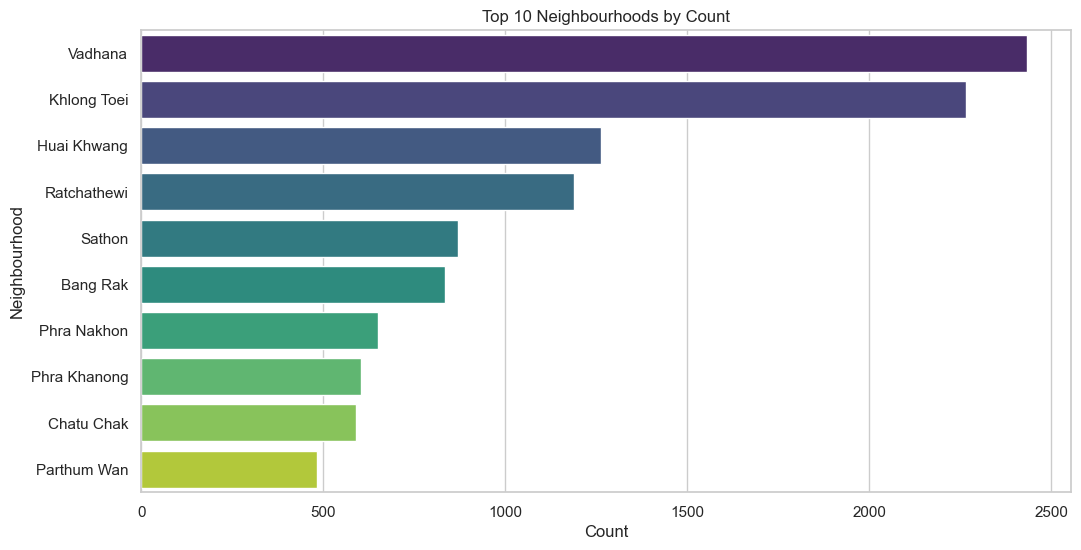

In [258]:
# Visualize the top 10 neighbourhoods by count using a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.head(10), y='neighbourhood', x='count', palette='viridis')
plt.title('Top 10 Neighbourhoods by Count')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\3807553349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='reviews_mean', ascending=False).head(10), y='neighbourhood', x='reviews_mean', palette='viridis')


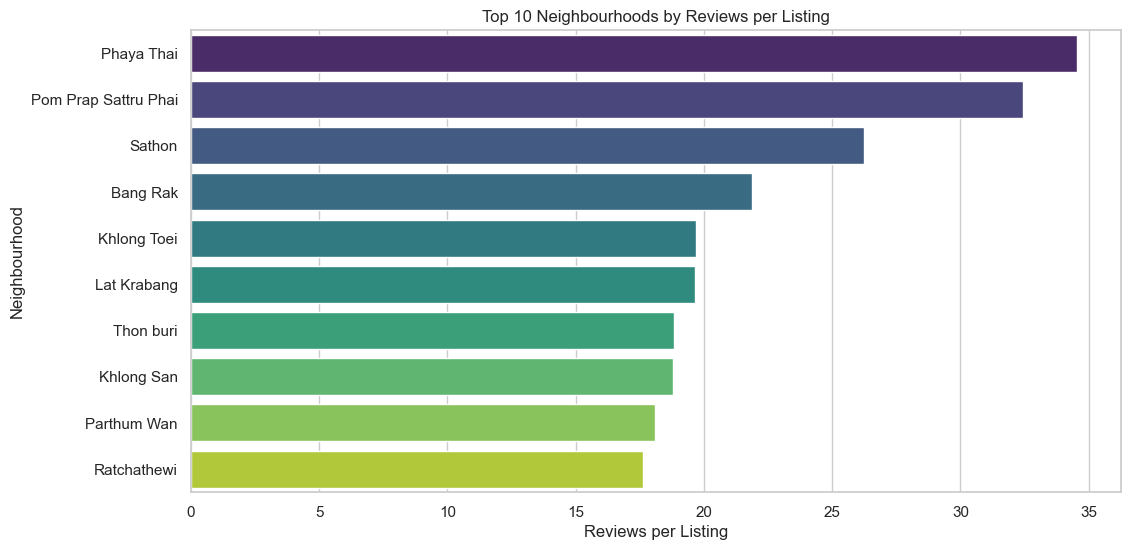

In [259]:
# Visualize the top 10 neighbourhoods by reviews per listing (reviews_mean)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='reviews_mean', ascending=False).head(10), y='neighbourhood', x='reviews_mean', palette='viridis')
plt.title('Top 10 Neighbourhoods by Reviews per Listing')
plt.ylabel('Neighbourhood')
plt.xlabel('Reviews per Listing')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\3919302021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='rpm_median', ascending=False).head(10), y='neighbourhood', x='rpm_median', palette='viridis')


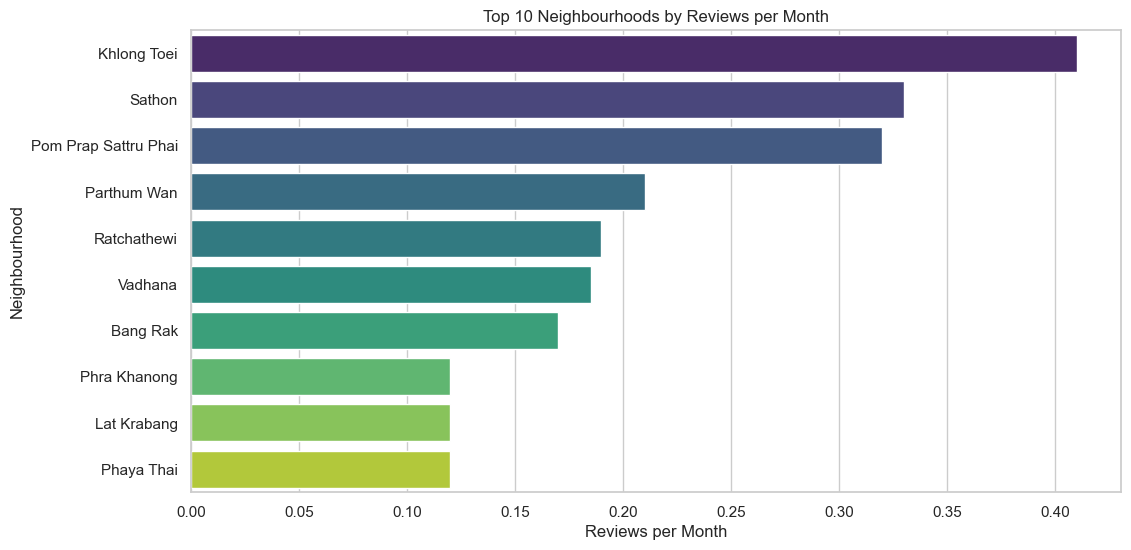

In [260]:
# Visualize the top 10 neighbourhoods by reviews per month tendency (rpm_median)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='rpm_median', ascending=False).head(10), y='neighbourhood', x='rpm_median', palette='viridis')
plt.title('Top 10 Neighbourhoods by Reviews per Month')
plt.ylabel('Neighbourhood')
plt.xlabel('Reviews per Month')
plt.show()

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\3260335017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_stats.sort_values(by='price_median', ascending=True).head(10), y='neighbourhood', x='price_median', palette='viridis')


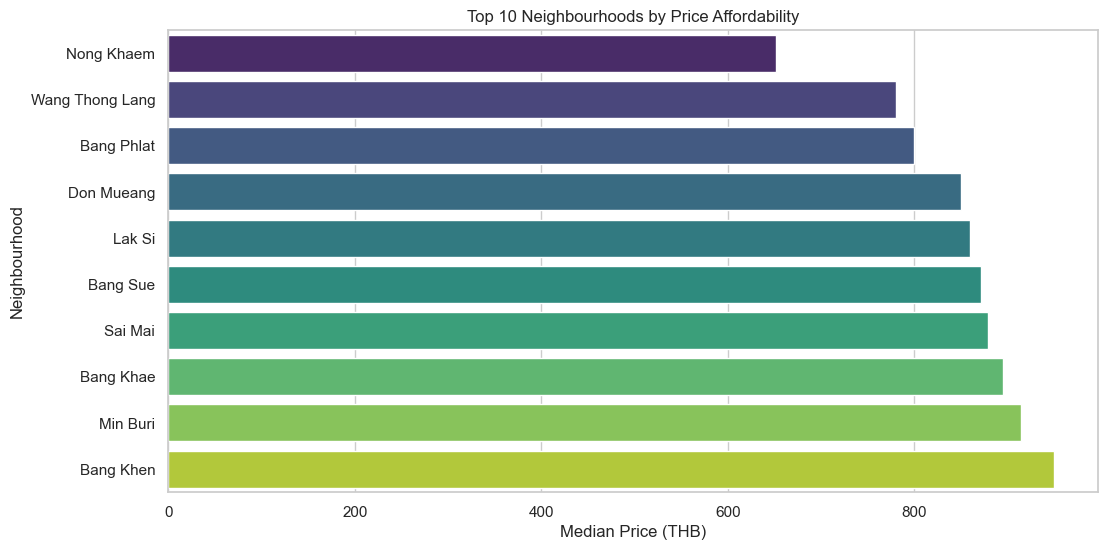

In [261]:
# Visualize the top 10 neighbourhoods by reviews per month tendency (rpm_median)
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_stats.sort_values(by='price_median', ascending=True).head(10), y='neighbourhood', x='price_median', palette='viridis')
plt.title('Top 10 Neighbourhoods by Price Affordability')
plt.ylabel('Neighbourhood')
plt.xlabel('Median Price (THB)')
plt.show()

Next, we are going to formulate a scoring criteria for the strategic value of each neighbourhood based on the following criteria:
1. Price closeness to overall median (1,389 THB)<br>
→ Closer = better (suggests balance between affordability and profitability)<br>
→ Use inverse absolute difference from the overall median

1. Number of reviews per listing (mean)<br>
→ Higher = better (indicates popularity & trust)

1. Reviews per month (median)<br>
→ Higher = better (indicates consistent demand)

1. Count<br>
→ Higher = better (indicates crowded activity in the area and high survivability rate)<br>
→ The weight for this metric will be lower since higher count also means high competition

In [262]:
# Score each metric

# Price Score (closer to overall median is better)
summary_stats['price_score'] = 1 / (1 + abs(summary_stats['price_median'] - 1389))

# Normalize mean_reviews (0–1)
summary_stats['reviews_score'] = (summary_stats['reviews_mean'] - summary_stats['reviews_mean'].min()) / (summary_stats['reviews_mean'].max() - summary_stats['reviews_mean'].min())

# Normalize median_rpm (0–1)
summary_stats['rpm_score'] = (summary_stats['rpm_median'] - summary_stats['rpm_median'].min()) / (summary_stats['rpm_median'].max() - summary_stats['rpm_median'].min())

# Normalize count (0-1)
summary_stats['count_score'] = (summary_stats['count'] - summary_stats['count'].min()) / (summary_stats['count'].max() - summary_stats['count'].min())

# Count the final strategic score
summary_stats['strategic_score'] = (
    0.15 * summary_stats['price_score'] +
    0.3 * summary_stats['reviews_score'] +
    0.4 * summary_stats['rpm_score'] +
    0.15 * summary_stats['count_score']
)

In [263]:
top_5_neighbourhoods = summary_stats.sort_values(by='strategic_score', ascending=False).head(5)
top_5_neighbourhoods

,neighbourhood,count,price_mean,price_median,price_std,reviews_sum,reviews_mean,reviews_median,reviews_std,rpm_mean,rpm_median,rpm_std,price_score,reviews_score,rpm_score,count_score,strategic_score
1,Khlong Toei,2265,3153.482119,1600.0,21763.965850,44564,19.675055,6.0,39.905536,0.951011,0.410,1.377470,0.004717,0.568175,1.000000,0.930395,0.710719
4,Sathon,869,2071.521289,1200.0,4028.301787,22790,26.225547,4.0,59.436697,0.710311,0.330,0.965912,0.005263,0.758549,0.804878,0.355437,0.603621
25,Pom Prap Sattru Phai,131,2550.167939,1647.0,2516.680127,4249,32.435115,4.0,70.147438,0.740534,0.320,1.053883,0.003861,0.939016,0.780488,0.051483,0.602201
0,Vadhana,2434,3282.442071,1817.0,8314.738945,36192,14.869351,2.0,31.458298,0.653809,0.185,1.050828,0.002331,0.428509,0.451220,1.000000,0.459390
12,Phaya Thai,403,1937.672457,1400.0,1747.838750,13917,34.533499,4.0,86.782686,0.613325,0.120,1.324238,0.083333,1.000000,0.292683,0.163509,0.454100


C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\3323699761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='strategic_score', palette='viridis')


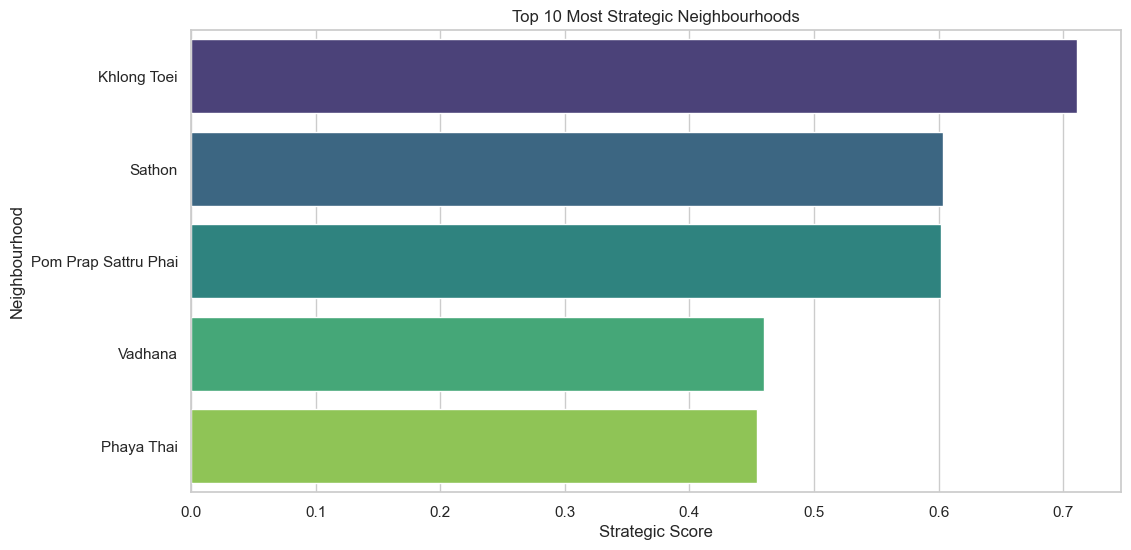

In [274]:
# Visualize the top 10 neighbourhoods by strategic score
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_neighbourhoods, y='neighbourhood', x='strategic_score', palette='viridis')
plt.title('Top 10 Most Strategic Neighbourhoods')
plt.ylabel('Neighbourhood')
plt.xlabel('Strategic Score')
plt.show()

Let's analyze these 5 neighbourhoods based on **apartment sales price** and **general area information** that can be found on the Internet. For **apartment sales price**, we used the help of LLMs to summarize actual sales data from FazWaz, Thailand Property, and Hipflat.

| Neighbourhood Name | Avg. Sales Price per sqm (THB) | General Area Description |
|---|---|---|
| Khlong Toei | 190,000 | Tourism area with famous local markets |
| Sathon | 240,000 | Luxury business district with a vibrant nightlife |
| Pom Prap Sattru Phai | 190,644 | Historic old town with traditional buildings, less commercialized |
| Vadhana (watthana) | 150,000 | Trendy district among expatriates and young professionals |
| Phaya Thai | 158,000 | Major transportation hub, a mixture of residential and commercial properties |

**Insights:**
<br>Among the top 5 areas, Khlong Toei has the biggest return potential despite the average sales price not being the lowest. This is because the area is bustling with tourists and highly commercialized.

**Conclusion:**<br>
From the EDA, the most profitable strategy is to open an Airbnb with **Entire home/apt** room type in **Khlong Toei** with a price range of **1000-2000 THB**.

### 7. Statistical Analysis

The goal of the statistical analysis is to determine whether other attributes in the dataset play a part in determining the popularity of a listing. This is to complete our analysis and make sure that we do not miss any recommendation.

#### Descriptive Statistics

In [265]:
summary_stats = df[['price', 'reviews_per_month', 'availability_365', 'minimum_nights']].describe()
print(summary_stats) 

                price  reviews_per_month  availability_365  minimum_nights
count    16981.000000       16981.000000      16981.000000    16981.000000
mean      2737.403686           0.573403        254.897827       12.969319
std      16715.217264           1.038588        122.425969       41.032402
min        278.000000           0.000000          0.000000        1.000000
25%        900.000000           0.000000        157.000000        1.000000
50%       1389.000000           0.120000        329.000000        1.000000
75%       2250.000000           0.760000        364.000000        7.000000
max    1000000.000000          20.580000        365.000000     1115.000000


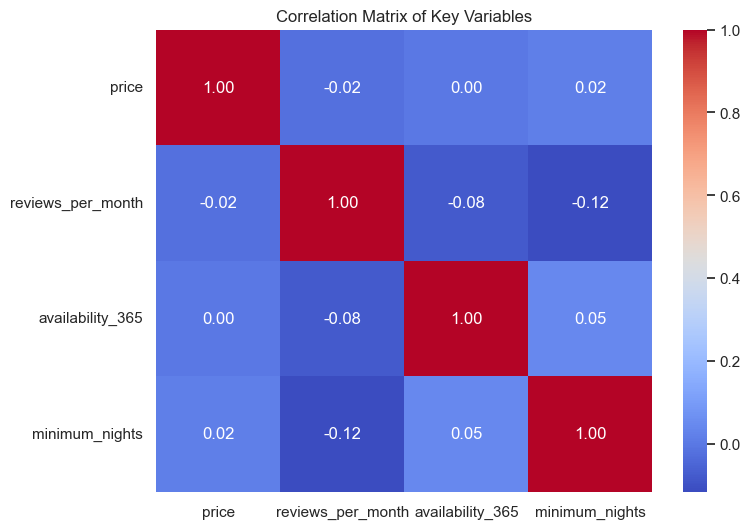

In [266]:
# Pearson Correlation heatmap
corr_matrix = df[['price', 'reviews_per_month', 'availability_365', 'minimum_nights']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Variables")
plt.show()

**Insights:**
1. The variables are mostly independent
1. Listings with a higher minimum nights tend to get less reviews. Since reviews directly correlate with popularity, this shows that people are less willing to rent if the minimum night requirement is high.

#### Inferential Statistics

In [267]:
# ANOVA: Do reviews per month significantly vary by neighborhood?
top_neigh_reviews = df.groupby("neighbourhood")["reviews_per_month"].mean().sort_values(ascending=False).head(10)
anova_result = stats.f_oneway(*(df[df["neighbourhood"] == n]["reviews_per_month"].dropna() for n in top_neigh_reviews.index))
print("ANOVA p-value (reviews per month by neighborhood):", anova_result.pvalue)

ANOVA p-value (reviews per month by neighborhood): 5.886847507233193e-21


**Insight:**<br>
Reviews per month does not significantly vary by neighourhood.

In [268]:
# ANOVA: Does price significantly vary by neighborhood?
top_neigh_price = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)
anova_price_result = stats.f_oneway(*(df[df["neighbourhood"] == n]["price"].dropna() for n in top_neigh_price.index))
print("ANOVA p-value (price by neighborhood):", anova_price_result.pvalue)

ANOVA p-value (price by neighborhood): 0.00036873519521913174


**Insight:**<br>
Price significantly varies by neighbourhood.

In [269]:
# Does minimum nights affect reviews per month?

# Select relevant columns
df_clean = df[['minimum_nights', 'reviews_per_month']]

# Categorize stays based on minimum_nights
def categorize_stay(nights):
    if nights <= 3:
        return 'Short Stay'
    elif nights <= 30:
        return 'Medium Stay'
    else:
        return 'Long Stay'

df_clean['stay_category'] = df_clean['minimum_nights'].apply(categorize_stay)

C:\Users\cindy.TESS\AppData\Local\Temp\ipykernel_18208\1530786723.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['stay_category'] = df_clean['minimum_nights'].apply(categorize_stay)


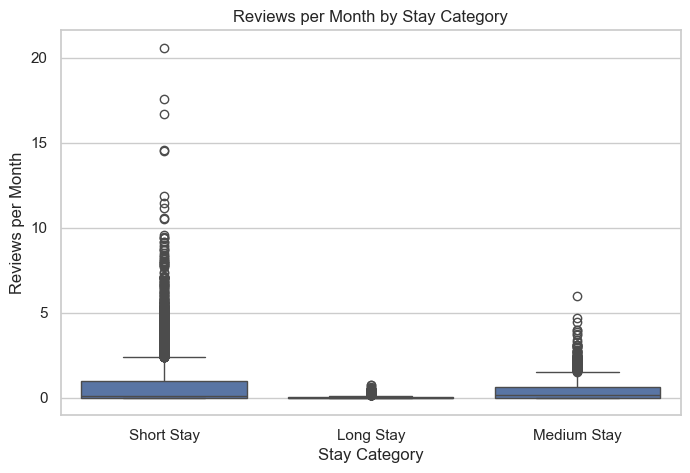

In [270]:
# Visualize Reviews per Month across Stay Categories
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='stay_category', y='reviews_per_month')
plt.title('Reviews per Month by Stay Category')
plt.xlabel('Stay Category')
plt.ylabel('Reviews per Month')
plt.show()

In [271]:
from scipy.stats import kruskal

# Kruskal-Wallis Test (non-parametric test for comparing more than 2 groups)
groups = [group['reviews_per_month'].values for name, group in df_clean.groupby('stay_category')]
kruskal_stat, kruskal_p = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p)

Kruskal-Wallis H-statistic: 378.8317406454131
p-value: 5.466794312840187e-83


In [272]:
# Interpret the result

if kruskal_p < 0.05:
    print("There is a statistically significant difference in reviews_per_month between stay categories.")
    print("Specifically, Short Stay listings (1-3 nights) tend to have the highest review frequency,")
    print("while Long Stay listings (>30 nights) receive the lowest reviews per month.")
else:
    print("There is no statistically significant difference in reviews_per_month between stay categories.")

There is a statistically significant difference in reviews_per_month between stay categories.
Specifically, Short Stay listings (1-3 nights) tend to have the highest review frequency,
while Long Stay listings (>30 nights) receive the lowest reviews per month.


**Insights:**<br>
1. Minimum stay requirement DOES impact the number of reviews per month in Bangkok Airbnb listings.
1. Shorter minimum stay tends to drive higher review activity from guests.

In [273]:
# Split the data
khlong_toei_reviews = df[df['neighbourhood'] == 'Khlong Toei']['reviews_per_month'].dropna()
other_reviews = df[df['neighbourhood'] != 'Khlong Toei']['reviews_per_month'].dropna()

# Welch's t-test (unequal variances), one-sided: Khlong Toei > others
t_stat, p_value = stats.ttest_ind(khlong_toei_reviews, other_reviews, equal_var=False, alternative='greater')

# Print result
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Listings in Khlong Toei are significantly more reviewed.")
else:
    print("Fail to reject H₀: No significant evidence that Khlong Toei listings are more reviewed.")

T-statistic: 14.5183
P-value: 0.0000
Reject H₀: Listings in Khlong Toei are significantly more reviewed.


**Insight:**
<br>Our recommendation from EDA was proven correct as Khlong Toei listings are indeed more reviewed.

**Conclusion:**
<br> We further add a recommendation that the minimum stay should be between 1-3 nights to drive more activity and increase popularity.

### 8. Overall Conclusion

From our analysis, we recommend starting an Airbnb business with the following ideal attributes:
1. Room type entire home/apartement
1. Price range 1000-2000 THB
1. Located in Khlong Toei
1. Minimum stay requirement 1-3 nights